### Forecasting 10yr-Treasury-Bond prices with Facebook Prophet Model

In [1]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan~=2.14
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from fbprophet import Prophet

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Upload the top 25 sp500 stocks csv file 
from google.colab import files
uploaded = files.upload()

Saving 10yrTreasuryBond.csv to 10yrTreasuryBond.csv


In [5]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("10yrTreasuryBond.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Close", "Low", "Volume"] , axis=1)
df = df.dropna()

# Preview the dataset
df.head()

,Adj Close
Date,
2017-12-19,2.463
2017-12-20,2.497
2017-12-21,2.481
2017-12-22,2.485
2017-12-26,2.467


In [6]:
# Reset the index so that we recode the columns for Prophet
df.reset_index(inplace = True)

In [7]:
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = df.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'})

In [8]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [9]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,2.463
1,2017-12-20,2.497
2,2017-12-21,2.481
3,2017-12-22,2.485
4,2017-12-26,2.467


,ds,y
1253,2022-12-12,3.611
1254,2022-12-13,3.501
1255,2022-12-14,3.503
1256,2022-12-15,3.450
1257,2022-12-16,3.482


In [10]:
# Sort the DataFrame by `ds` in ascending order
prophet_df = prophet_df.sort_values('ds', ascending = True)

# Display sample data from head and tail
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,2.463
1,2017-12-20,2.497
2,2017-12-21,2.481
3,2017-12-22,2.485
4,2017-12-26,2.467


,ds,y
1253,2022-12-12,3.611
1254,2022-12-13,3.501
1255,2022-12-14,3.503
1256,2022-12-15,3.450
1257,2022-12-16,3.482


In [11]:
# Call the Prophet function, store as an object
model_10yrbond = Prophet()

In [12]:
# Fit the Prophet model.
model_10yrbond.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model_10yrbond.make_future_dataframe(periods = 30, freq = 'D')

# View the last five rows of the predictions
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-12-19
1,2017-12-20
2,2017-12-21
3,2017-12-22
4,2017-12-26


,ds
1283,2023-01-11
1284,2023-01-12
1285,2023-01-13
1286,2023-01-14
1287,2023-01-15


In [14]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model_10yrbond.predict(future_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_trends.head())
display(forecast_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-19,2.553685,2.295478,2.671374,2.553685,2.553685,-0.068218,-0.068218,-0.068218,0.029170,0.029170,0.029170,-0.097388,-0.097388,-0.097388,0.0,0.0,0.0,2.485467
1,2017-12-20,2.555618,2.299964,2.690013,2.555618,2.555618,-0.067200,-0.067200,-0.067200,0.025410,0.025410,0.025410,-0.092610,-0.092610,-0.092610,0.0,0.0,0.0,2.488418
2,2017-12-21,2.557551,2.306816,2.673933,2.557551,2.557551,-0.064606,-0.064606,-0.064606,0.022863,0.022863,0.022863,-0.087469,-0.087469,-0.087469,0.0,0.0,0.0,2.492945
3,2017-12-22,2.559485,2.321519,2.698126,2.559485,2.559485,-0.058772,-0.058772,-0.058772,0.023246,0.023246,0.023246,-0.082018,-0.082018,-0.082018,0.0,0.0,0.0,2.500713
4,2017-12-26,2.567217,2.365496,2.733821,2.567217,2.567217,-0.029090,-0.029090,-0.029090,0.029170,0.029170,0.029170,-0.058260,-0.058260,-0.058260,0.0,0.0,0.0,2.538127


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1283,2023-01-11,4.265198,4.093698,4.488180,4.255713,4.270825,0.028584,0.028584,0.028584,0.025410,0.025410,0.025410,0.003175,0.003175,0.003175,0.0,0.0,0.0,4.293782
1284,2023-01-12,4.272094,4.105993,4.478187,4.261983,4.278251,0.026349,0.026349,0.026349,0.022863,0.022863,0.022863,0.003485,0.003485,0.003485,0.0,0.0,0.0,4.298443
1285,2023-01-13,4.278991,4.115184,4.495911,4.268035,4.285600,0.026696,0.026696,0.026696,0.023246,0.023246,0.023246,0.003450,0.003450,0.003450,0.0,0.0,0.0,4.305688
1286,2023-01-14,4.285888,4.032527,4.432409,4.273411,4.293485,-0.061588,-0.061588,-0.061588,-0.064717,-0.064717,-0.064717,0.003128,0.003128,0.003128,0.0,0.0,0.0,4.224300
1287,2023-01-15,4.292785,4.036935,4.418613,4.278643,4.300766,-0.062132,-0.062132,-0.062132,-0.064717,-0.064717,-0.064717,0.002585,0.002585,0.002585,0.0,0.0,0.0,4.230653


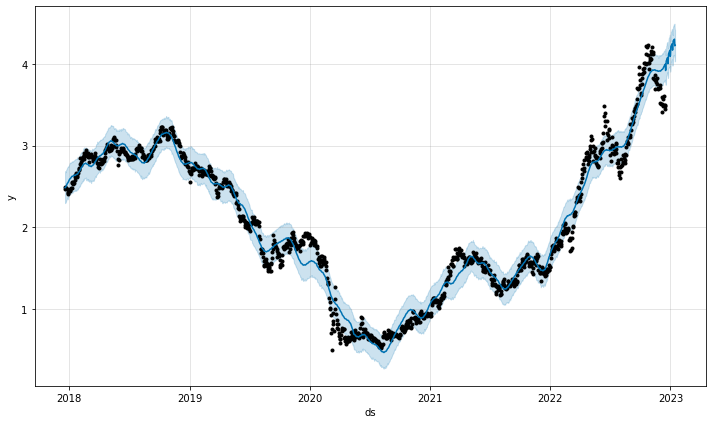

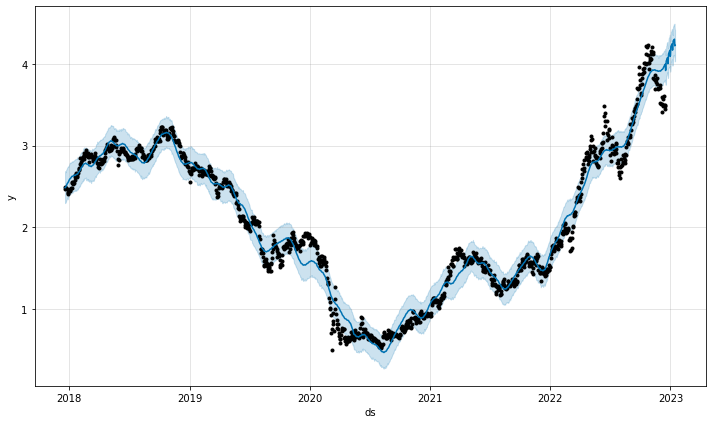

In [15]:
# Plot the Prophet predictions for the Mercado trends data
model_10yrbond.plot(forecast_trends)

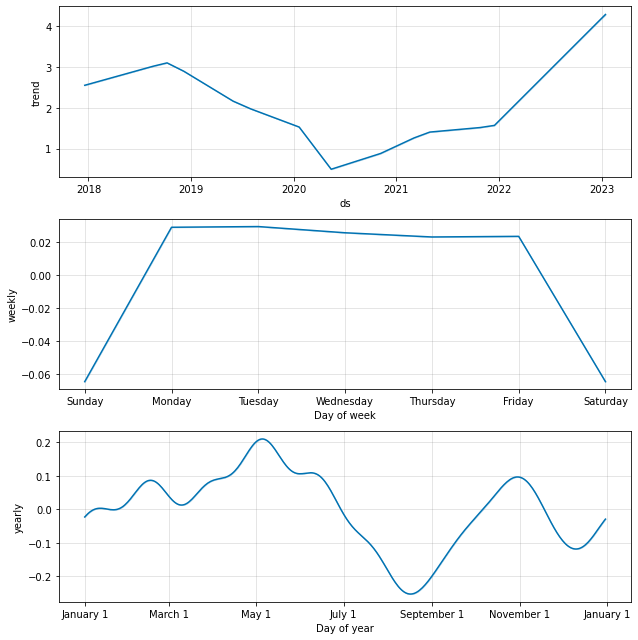

In [16]:
# Use the plot_components function to visualize the forecast results 
figures = model_10yrbond.plot_components(forecast_trends)

In [17]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends.set_index('ds', inplace = True)
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2017-12-19,2.553685,2.295478,2.671374,2.553685,2.553685,-0.068218,-0.068218,-0.068218,0.029170,0.029170,0.029170,-0.097388,-0.097388,-0.097388,0.0,0.0,0.0,2.485467
2017-12-20,2.555618,2.299964,2.690013,2.555618,2.555618,-0.067200,-0.067200,-0.067200,0.025410,0.025410,0.025410,-0.092610,-0.092610,-0.092610,0.0,0.0,0.0,2.488418
2017-12-21,2.557551,2.306816,2.673933,2.557551,2.557551,-0.064606,-0.064606,-0.064606,0.022863,0.022863,0.022863,-0.087469,-0.087469,-0.087469,0.0,0.0,0.0,2.492945
2017-12-22,2.559485,2.321519,2.698126,2.559485,2.559485,-0.058772,-0.058772,-0.058772,0.023246,0.023246,0.023246,-0.082018,-0.082018,-0.082018,0.0,0.0,0.0,2.500713
2017-12-26,2.567217,2.365496,2.733821,2.567217,2.567217,-0.029090,-0.029090,-0.029090,0.029170,0.029170,0.029170,-0.058260,-0.058260,-0.058260,0.0,0.0,0.0,2.538127


In [18]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

forecast_trends_updated = forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_trends_updated.iloc[-240:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_trends = forecast_trends.reset_index()
forecast = forecast_trends[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Replace the column names to something less technical sounding
forecast = forecast.rename(columns = 
                                             {'yhat' : 'Most Likely Case',
                                              'yhat_lower' : 'Worst Case',
                                              'yhat_upper' : 'Best Case'}
                                             )

forecast = forecast.loc['2022-12-19':]
forecast.to_csv('10yrTreasuryBond_forecast.csv', index = False)
# Review the last five rows of the DataFrame
display(forecast.head())
display(forecast.tail())

,ds,Most Likely Case,Worst Case,Best Case
203,2018-10-10,3.139740,2.957844,3.325605
204,2018-10-11,3.138858,2.960546,3.323077
205,2018-10-12,3.140952,2.950225,3.324531
206,2018-10-15,3.151732,2.949764,3.344290
207,2018-10-16,3.153901,2.956941,3.326951


,ds,Most Likely Case,Worst Case,Best Case
1283,2023-01-11,4.293782,4.093698,4.488180
1284,2023-01-12,4.298443,4.105993,4.478187
1285,2023-01-13,4.305688,4.115184,4.495911
1286,2023-01-14,4.224300,4.032527,4.432409
1287,2023-01-15,4.230653,4.036935,4.418613


In [21]:
# Display the average forecasted price for November 2022
forecast.mean()

Most Likely Case    4.166896
Worst Case          3.979705
Best Case           4.353781
dtype: float64